In [ ]:
# Within this notebook I analyse some stats for 2020 in comparison with 
# previous crashes like 2008, 1987 and 1929.

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Any results you write to the current directory are saved as output.     

from pandas_datareader import data as web
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [3]:
def highlight_max_yellow(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
def highlight_max_all(s):
    is_max = s == s.max()
    return ['background-color: #b5f5d4' if v else '' for v in is_max]

def highlight_greaterthan(s,column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= 1
    return ['background-color: red' if is_max.any() else '' for v in is_max]

def highlight_min(data):
    color_min= '#f59d71' #green   
    attr = 'background-color: {}'.format(color_min)

    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else: 
        is_min = data.groupby(level=0).transform('min') == data
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    

In [47]:
df_1929 = pd.read_csv('./input/DOW_1929.csv')
df_1987 = pd.read_csv('./input/SP500_1987.csv')
df_2008 = pd.read_csv('./input/SP500_2008.csv')
df_2020 = pd.read_csv('./input/SP500_2020.csv')


In [13]:
#Auto update
start_20 = '2020-2-11'
end_20 = date.today()
# df_20 = web.DataReader('^GSPC','google',start = start_20, end = end_20)
df_20 = yf.download('^GSPC', start = start_20, end=end_20)

df_2020 = df_20.copy()

d_counter = len(df_2020)

df_1929.columns = ['Date','Adj Close']

df_1929 = df_1929[31:]
#(df_1929[27:]['Adj Close'].pct_change(1)*100).head(30)

[*********************100%***********************]  1 of 1 completed


In [48]:
df_1929.head()
df_1987.head()
df_2008.head()
df_2020.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
82,2020-06-09,3222.709961,3193.110107,3213.320068,3207.179932,6382620000,3207.179932
83,2020-06-10,3223.270020,3181.489990,3213.419922,3190.139893,6570840000,3190.139893
84,2020-06-11,3123.530029,2999.489990,3123.530029,3002.100098,7018890000,3002.100098
85,2020-06-12,3088.419922,2984.469971,3071.040039,3041.310059,5832250000,3041.310059
86,2020-06-15,3079.760010,2965.659912,2993.760010,3066.590088,5740660000,3066.590088


In [15]:

# data = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')
# data.head()

In [49]:
df_2020.describe()


,High,Low,Open,Close,Volume,Adj Close
count,87.000000,87.000000,87.000000,87.000000,8.700000e+01,87.000000
mean,2925.366654,2851.125629,2891.660914,2889.815045,6.023151e+09,2889.815045
std,255.610512,283.680652,270.251132,269.342760,1.391392e+09,269.342760
min,2300.729980,2191.860107,2290.709961,2237.399902,3.398040e+09,2237.399902
25%,2793.709961,2724.135010,2783.635010,2748.270020,5.091770e+09,2748.270020
50%,2921.149902,2863.550049,2908.830078,2881.189941,5.792140e+09,2881.189941
75%,3089.689941,2999.660034,3063.660034,3050.020020,6.819515e+09,3050.020020
max,3393.520020,3378.830078,3380.449951,3386.149902,9.044690e+09,3386.149902


In [22]:
# df_2020 = df_2020.to_csv("./SP500_2020_1.csv")
# df_2020.head()

In [23]:
# current dataset
df_2020 = pd.read_csv("./input/SP500_2020_1.csv")
df_2020.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-10,3318.280029,3352.260010,3317.770020,3352.090088,3352.090088,3450350000
1,2020-02-11,3365.870117,3375.629883,3352.719971,3357.750000,3357.750000,3760550000
2,2020-02-12,3370.500000,3381.469971,3369.719971,3379.449951,3379.449951,3926380000
3,2020-02-13,3365.899902,3385.090088,3360.520020,3373.939941,3373.939941,3498240000
4,2020-02-14,3378.080078,3380.689941,3366.149902,3380.159912,3380.159912,3398040000


In [24]:
d = pd.concat([df_1929.describe()['Adj Close'],df_1987.describe()['Adj Close'],df_2008.describe()['Adj Close'],df_2020.describe()['Adj Close']],axis=1)
d.columns = ['DOW_1929','SP500_1987','SP500_2008','SP500_2020']
pd.concat([d[['DOW_1929','SP500_1987','SP500_2008','SP500_2020']][1:2],d[['DOW_1929','SP500_1987','SP500_2008','SP500_2020']][3:4],d[['DOW_1929','SP500_1987','SP500_2008','SP500_2020']][7:8]])

,DOW_1929,SP500_1987,SP500_2008,SP500_2020
mean,169.75454,255.700157,987.341530,3460.807820
min,41.22000,223.919998,752.440002,2237.399902
max,352.86000,328.079987,1277.579956,4232.600098


In [50]:
# candlestic visualization

df_2020 = df_2020.reset_index()
fig = go.Figure(data=[go.Candlestick(x=df_2020['Date'],
                open=df_2020['Open'],
                high=df_2020['High'],
                low=df_2020['Low'],
                close=df_2020['Close'])])

fig.update_layout(
    title='Crash 2020',
    yaxis_title='SP500 Index',
    xaxis_title='Date'
)

fig.show()

In [26]:
fig = go.Figure(data=[go.Candlestick(x=df_2008['Date'],
                open=df_2008['Open'],
                high=df_2008['High'],
                low=df_2008['Low'],
                close=df_2008['Close'],
                )])

fig.update_layout(
    title='Crash 2008',
    yaxis_title='SP500 Index',
    xaxis_title='Date'
)

fig.show()

In [27]:
fig = go.Figure(data=[go.Candlestick(x=df_1987['Date'],
                open=df_1987['Open'],
                high=df_1987['High'],
                low=df_1987['Low'],
                close=df_1987['Close'],                
                )])


fig.update_layout(
    title='Crash 1987',
    yaxis_title='SP500 Index',
    xaxis_title='Date'
)

fig.show()

In [28]:
fig = px.line(df_1929.iloc[0:100],x='Date',y='Adj Close')
fig.update_layout(
    title='Crash 1929',
    yaxis_title='DOW Index',
    xaxis_title='Date'
)

fig.show()

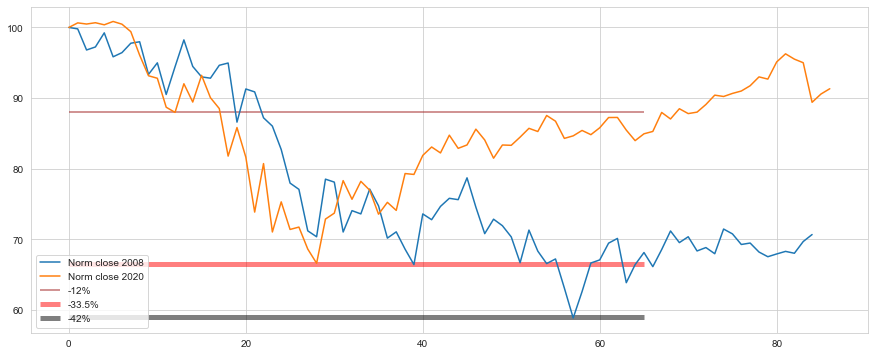

In [54]:
# Daily returns , Drawdowns , MAX/MINs

#plt.title('Crash 2020 vs Crash 2008')

#Normalize data
c = pd.concat([df_2008['Adj Close'],df_2020['Adj Close']],axis=1)
c = c/c.iloc[0] * 100
c.columns = ['Adj Close 08','Adj Close 20']

sns.set_style('whitegrid')
plt.figure(figsize=(15,6))

c['Adj Close 08'].plot(label='Norm close 2008')
c['Adj Close 20'].plot(label='Norm close 2020')


#plt.xlabel('Days')

plt.hlines(y=88,xmin=0,xmax=65, color='brown', alpha=0.5 , lw=2 , label = '-12%')
plt.hlines(y=66.5,xmin=0,xmax=65, color='r', alpha=0.5 , lw=5 , label = '-33.5%')
plt.hlines(y=59,xmin=0,xmax=65, color='black', alpha=0.5 , lw=5 , label = '-42%')
plt.legend()
plt.show()

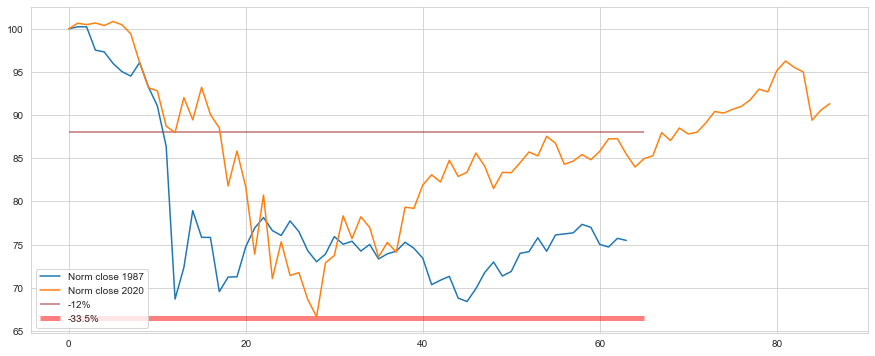

In [52]:
#Normalize data
c = pd.concat([df_1987['Adj Close'],df_2020['Adj Close']],axis=1)
c = c/c.iloc[0] * 100
c.columns = ['Adj Close 87','Adj Close 20']

sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
c['Adj Close 87'].plot(label='Norm close 1987')
c['Adj Close 20'].plot(label='Norm close 2020')
#plt.title('Crash 2020 vs Crash 1987')
#plt.xlabel('Days')
plt.hlines(y=88,xmin=0,xmax=65, color='brown', alpha=0.5 , lw=2 , label = '-12%')
plt.hlines(y=66.5,xmin=0,xmax=65, color='r', alpha=0.5 , lw=5 , label = '-33.5%')

plt.legend()
plt.show()

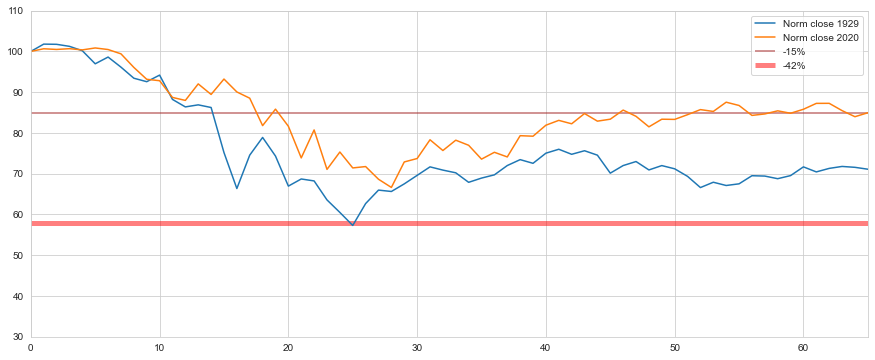

In [57]:
df_1929.columns = ['Date','Adj Close']

df_1929 = df_1929[31:]

#Normalize data

#plt.title('Crash 2020 vs Crash 1929')

df_1929 = df_1929.reset_index().drop('index',axis=1)
c = pd.concat([df_1929['Adj Close'],df_2020['Adj Close']],axis=1)
c = c/c.iloc[0] * 100
c.columns = ['Adj Close 29','Adj Close 20']

sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
c['Adj Close 29'].plot(label='Norm close 1929')
c['Adj Close 20'].plot(label='Norm close 2020')

#plt.xlabel('Days')

plt.hlines(y=85,xmin=0,xmax=65, color='brown', alpha=0.5 , lw=2 , label = '-15%')
plt.hlines(y=58,xmin=0,xmax=65, color='r', alpha=0.5 , lw=5 , label = '-42%')
plt.xlim(0,65)
plt.ylim(30,110)
plt.legend()
plt.show()

In [58]:
#Max drawdown, 
c = pd.concat([df_1929['Adj Close'],df_1987['Adj Close'],df_2008['Adj Close'],df_2020['Adj Close']],axis=1)

daily_returns = c.pct_change(1)
round(daily_returns*100,2).describe()[3:4]
round(daily_returns*100,2).describe()[7:8]
daily_ret = round(daily_returns*100,2)
daily_ret = daily_ret[0:80]
daily_ret.columns = ['1929','1987','2008','2020']
 
cm = sns.light_palette("red", as_cmap=True)

#Crash starting
dfin = daily_ret.head(40).dropna().head(40).iloc[6:]
#dfin[['1929','1987','2008','2020']].style.apply(highlight_min)
dfin[['1929','1987','2008','2020']].style.background_gradient(cmap='viridis')

,1929,1987,2008,2020
7,-2.510000,-0.540000,1.380000,-1.050000
8,-2.830000,1.660000,0.210000,-3.350000
9,-0.910000,-2.950000,-4.710000,-3.030000
10,1.750000,-2.340000,1.750000,-0.380000
11,-6.330000,-5.160000,-4.710000,-4.420000
12,-2.090000,-20.470000,4.330000,-0.820000
13,0.580000,5.330000,4.030000,4.600000
14,-0.750000,9.100000,-3.820000,-2.810000
15,-12.820000,-3.920000,-1.560000,4.220000
16,-11.730000,-0.010000,-0.200000,-3.390000


In [59]:
dfin[['1929','1987','2008','2020']].describe()[2:].style.background_gradient(cmap='viridis')

,1929,1987,2008,2020
std,5.430465,4.783153,4.443634,5.117983
min,-12.820000,-20.470000,-9.030000,-11.980000
25%,-3.320000,-1.930000,-3.850000,-3.390000
50%,-0.750000,-0.010000,-1.130000,-1.510000
75%,2.610000,1.570000,1.380000,3.350000
max,12.340000,9.100000,11.580000,9.380000


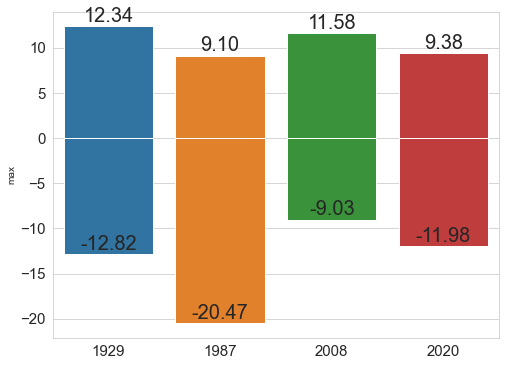

In [60]:
#2 months max/min

stats= daily_ret[1:62].describe().T
plt.figure(figsize=(8,6))
sns.barplot(x=stats.index.values,y=stats['min'])
splot = sns.barplot(x=stats.index.values,y=stats['max'])
splot.tick_params(labelsize=15)
#plt.ylabel('Min / Max')
#plt.xlabel('Crash')
#plt.title ('Crashes Max/Min High/Low')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), \
                   textcoords = 'offset points',size=20)
plt.show()

In [61]:
# Cumulative up/down after 2 and 4 weeks since crash

#2 weeks
dfin2 = daily_ret.head(40).dropna().head(40).iloc[10:]
dfin2.iloc[0:25].head(15).cumsum()[-1:].style.background_gradient(cmap='coolwarm')

,1929,1987,2008,2020
25,-45.700000,-12.030000,-18.430000,-23.260000


In [62]:
#4 weeks
dfin2 = daily_ret.head(40).dropna().head(40).iloc[10:]
dfin2.iloc[0:25].head(30).cumsum()[-1:].style.background_gradient(cmap='viridis')

,1929,1987,2008,2020
35,-26.490000,-17.700000,-21.020000,-19.320000


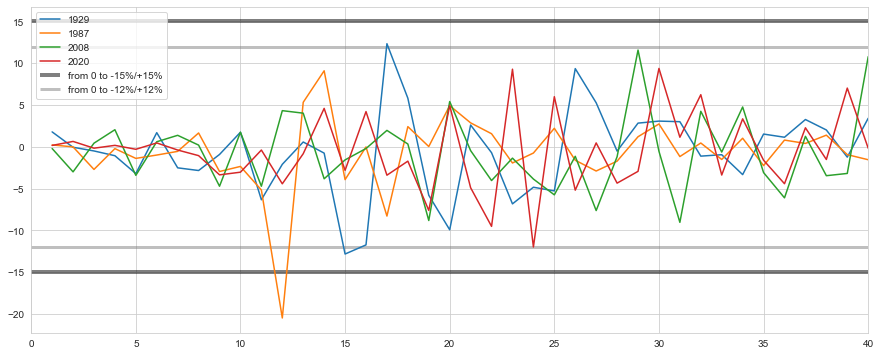

In [37]:
daily_ret.plot(figsize=(15,6))
plt.hlines(y=-15,xmin=0,xmax=65, color='black', alpha=0.5 , lw=4 )
plt.hlines(y=15,xmin=0,xmax=65, color='black', alpha=0.5 , lw=4 , label = 'from 0 to -15%/+15%')
plt.hlines(y=-12,xmin=0,xmax=65, color='grey', alpha=0.5 , lw=3 , label = 'from 0 to -12%/+12%')
plt.hlines(y=12,xmin=0,xmax=65, color='grey', alpha=0.5 , lw=3 )
plt.title = 'Daily Pct. Change'
plt.xlabel = 'Days'
plt.ylabel = 'Pct. Change'
plt.xlim(0,40)
plt.legend()
plt.show()

<ipython-input-63-49f54b4230fb>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



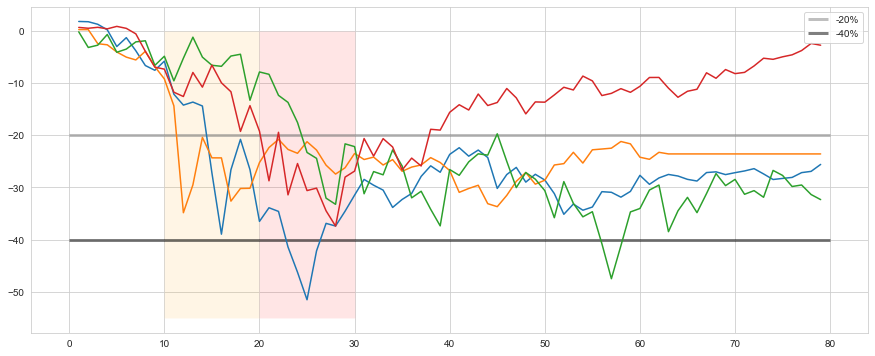

In [63]:
# Cumulative change

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(daily_ret.cumsum())

ax.fill_between(x=[10,20],y1=[-55,-55],facecolor='orange', alpha=0.1)
ax.fill_between(x=[20,30],y1=[-55,-55],facecolor='red', alpha=0.1)
ax.hlines(y=-20,xmin=0,xmax=80, color='grey', alpha=0.5 , lw=3 , label = '-20%')
ax.hlines(y=-40,xmin=0,xmax=80, color='black', alpha=0.5 , lw=3 , label = '-40%')
plt.legend()
fig.show()

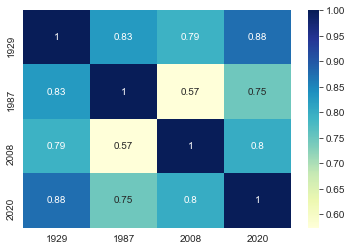

In [64]:
# Correlation

corr_check = c.iloc[1:24]
corr_check.columns =  ['1929','1987','2008','2020']
#corr_check.corr()

sns.heatmap(corr_check.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [65]:
# Monte Carlo simulation

#Log returns
logr_2020 = np.log(1+ df_2020['Adj Close'].pct_change())
#mean
u = logr_2020.mean()
#variance
var = logr_2020.var()
#drift
drift = u - (0.5 * var)
#stdev
stdev = logr_2020.std()

In [66]:
from scipy.stats import norm

t_intervals = 30
iterations = 250

d_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

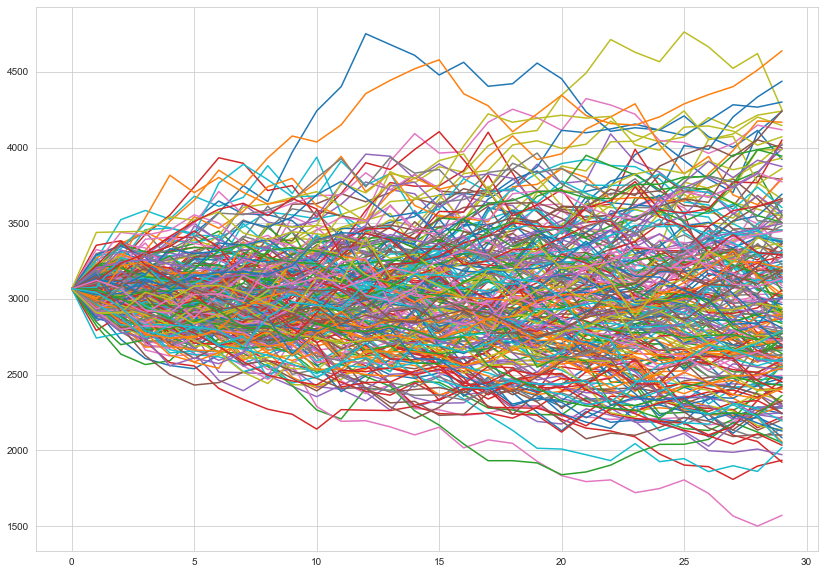

In [67]:
S0 = df_2020['Adj Close'].iloc[-1]
price_list = np.zeros_like(d_returns)
price_list[0] = S0

#x=range(0,t_intervals)
#canal_h = -1.2*x 
#canal_l = -1.3*x

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * d_returns[t]

plt.figure(figsize=(14,10))
plt.plot(price_list,label='S&P500 Forecast')
#plt.plot(range(3000,2500,-17),lw=3,color='black',label='Channel')
#plt.plot(range(2000,1500,-17),lw=3,color='black')
#plt.title('S&P 30 days forecasting')

plt.show()

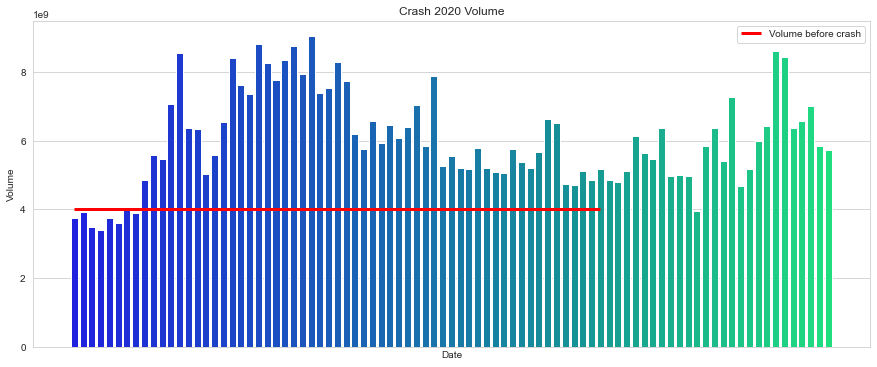

In [68]:
# volume studies

df_2020['Volume']

fig, ax = plt.subplots(figsize=(15,6))
ax.set_title('Crash 2020 Volume')
ax.set_ylabel('Volume')
fig = sns.barplot(x='Date',y='Volume',data=df_2020, palette='winter')
plt.xticks(rotation=90,visible=False)
#ax2 = ax.twinx()
#color = 'tab:green'
#ax2.set_ylabel('Adj price', fontsize=16, color=color)
#ax2 = sns.lineplot(x='Date', y='Adj Close', data = df_2020, color=color)
#ax2.tick_params(axis='y', color=color)
plt.hlines(y=0.4e10,xmin=0,xmax=60,color='red',lw=3,label='Volume before crash')
plt.legend()
plt.show()